In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error #measuring the progress of success 
from sklearn.model_selection import cross_val_score

In [2]:
cd "/content/drive/My Drive/#DataWorkshop/Colab Notebooks/DW_matrix"

/content/drive/My Drive/#DataWorkshop/Colab Notebooks/DW_matrix


In [3]:
ls Data

men_shoes.csv


In [4]:
df = pd.read_csv("Data/men_shoes.csv", low_memory=False)
df.shape

(18280, 48)

In [5]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [6]:
mean_price = np.mean( df['prices_amountmin'] )
mean_price

93.53952188183217

In [7]:
y_true = df['prices_amountmin'] 
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

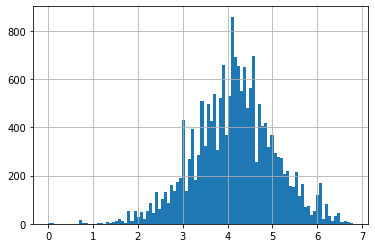

In [8]:
np.log( df['prices_amountmin'] +1).hist(bins=100);

In [9]:
y_true = df['prices_amountmin'] 
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [10]:
y_true = df['prices_amountmin'] 
price_log_mean = np.expm1( np.mean( np.log1p(y_true))) 
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df['brand_cat'] = df['brand'].factorize()[0]

In [0]:
def run_model(feats):
  X = df[ feats ].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=25)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)


In [0]:
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]

In [17]:
run_model(['brand_cat'])

(-46.325196752591935, 3.3537869099138353)

In [20]:
run_model(['manufacturer_cat'])

(-58.44883543958339, 3.2600442015953877)

In [19]:
features = ['manufacturer_cat', 'brand_cat']

run_model(features)

(-47.3316846451609, 3.960929777038935)

In [0]:
ls

Data/  HELLoGithub.ipynb  matrix_one/  README.md


In [0]:
ls 

Data/  HELLoGithub.ipynb  matrix_one/  README.md


In [0]:
!git add matrix_one/day4.ipynb

In [0]:
!git commit -m 'ML price prediction'


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@66c7341a6b78.(none)')


In [0]:
!git config --global user.email "serhiy.chubyk@hotmail.com"
!git config --global user.name "Serhiy"


In [0]:
!git push origin master

Everything up-to-date
